shape of X_train: (2000, 100, 100, 3)
shape of Y_train: (2000, 1)
shape of X_test: (400, 100, 100, 3)
shape of Y_test: (400, 1)


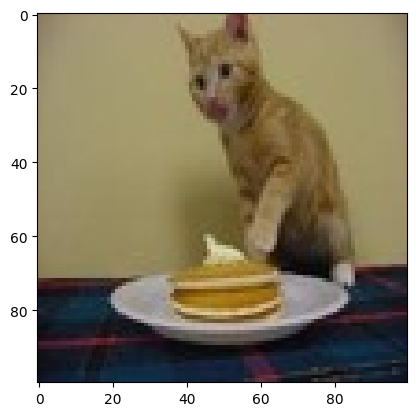

Epoch 1/5
32/32 [==============================] - 16s 380ms/step - loss: 0.7080 - accuracy: 0.4925
Epoch 2/5
32/32 [==============================] - 12s 380ms/step - loss: 0.6888 - accuracy: 0.5470
Epoch 3/5
32/32 [==============================] - 12s 384ms/step - loss: 0.6495 - accuracy: 0.6245
Epoch 4/5
32/32 [==============================] - 12s 384ms/step - loss: 0.6001 - accuracy: 0.6695
Epoch 5/5
13/13 [==============================] - 1s 59ms/step - loss: 0.6149 - accuracy: 0.6825


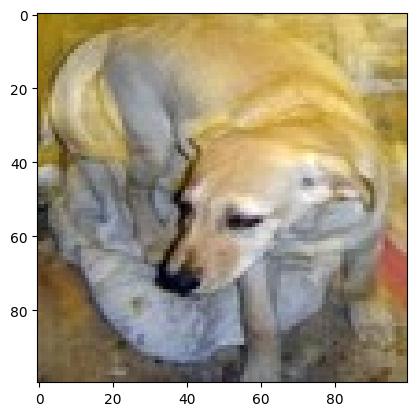

1/1 [==============================] - 0s 219ms/step
input image is cat


In [23]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# Load data
X_train = np.loadtxt('Input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

# Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train=X_train/255.0
X_test=X_test/255.0
# Now you can use the loaded and reshaped data
print("shape of X_train:", X_train.shape)
print("shape of Y_train:", Y_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of Y_test:", Y_test.shape)

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])





In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=64)

model.evaluate(X_test,Y_test)

# Save pretrained model
model.save('pretrained_model.keras') 


Epoch 1/5
32/32 [==============================] - 17s 437ms/step - loss: 0.1546 - accuracy: 0.9360
Epoch 2/5
32/32 [==============================] - 14s 446ms/step - loss: 0.0388 - accuracy: 0.9980
Epoch 3/5
32/32 [==============================] - 14s 434ms/step - loss: 0.0257 - accuracy: 0.9990
Epoch 4/5
32/32 [==============================] - 14s 435ms/step - loss: 0.0214 - accuracy: 0.9990
Epoch 5/5
13/13 [==============================] - 1s 65ms/step - loss: 1.1329 - accuracy: 0.6875


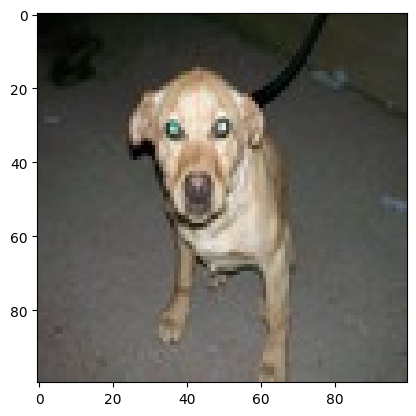

1/1 [==============================] - 0s 145ms/step
input image is dog


In [27]:
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
           
Y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
Y_pred=Y_pred>0.5
if(Y_pred==0):
    pred='dog'
else:
    pred='cat'
print("input image is",pred)

